# Basic Analysis of Shuffling Effects on a Deck of Cards

## Alexander Stein

### May 7, 2020

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import random
from Shufflers.AShuffler import *
num_cards = 52

## 1. Introduction

Quantitative analysis of randomizing a deck of cards has been a topic of research for almost a century.  Efficient shuffling has varying implications ranging from ensuring fairnesss at a casino to information theory.  Early analysis includes Gilber and Shannon \cite{GS1955}, as well as Reeds (in an unpublished 1981 manuscript).  Later Bayer and Diaconis \cite{BD92} use rising sequences to describe how a deck is sufficiently randomized after 7 shuffles and Trefethen and Trefethen \cite{TT2000} TODO. Most of these analyses focus on the common GSR or "riffle" shuffle, however there are other practical shuffling techniques and variations that yield different results.

This is a high level analysis showing that using different shuffling algorithms and different definitions of randomness will yield varying requirements for the number of shuffles required to achieve "randomness."  Much of my clarity came from Mann \cite{MANN95} who did a great job of synthesizing on the material.

## 2. Summary of Prior Work

### Important prior concepts

#### 1. (GSR) Riffle shuffle and implementation

A shuffle is a rearrangement of the elements in an ordered list \cite{Wolfram}. When describing the possible permutations of a deck of cards the riffle shuffle is one of the most common types of shuffles used to "randomize" a deck.  A riffle shuffle occurs when a deck is cut into two, and interleaved back together.  Gilbert and Shannon first formalized this process in a Technical Memo at Bell Labs in 1955 \cite{GS1955}.  Later Reeds independently formalized the process hence the equivalent name "GSR" shuffle.

There are multiple ways to implement the riffle shuffle (see \cite{BD92}), the simplest of which is to cut the deck according to a binomial distribution and then interleave the two decks one card at a time as follows:

```
    def cut(int: deck_length, ) -> int:
        return binom.rvs(deck_length, 0.5)

    def riffle(deck_length: int, cut_location: int) -> list:
        i = 0
        j = cut_location
        output_deck = []
        for c in range(deck_length):
            s_x = cut_location - i
            s_y = deck_length - j
            deck_prob = s_y / (s_x + s_y)
            choice = bernoulli.rvs(deck_prob)
            if choice == 0:
                output_deck.append(i)
                i += 1
            else:
                output_deck.append(j)
                j += 1

        return output_deck

```

#### 2. $a$-shuffle vs $ab$-shuffle

Bayer and Diaconis define an $a$-shuffle as a more generalized version of the riffle shuffle where $a$ correspondes to the number of cuts in the deck \cite{BD92}.  A riffle shuffle would therefore be equivalent to a $2$-shuffle. The probability of getting a particular permutaion after an $a$-shuffle whould be given by:

\begin{equation}\label{eq:}
\frac{1}{a^n}
\end{equation}

See Supplemental Proofs (TODO add link) for additional details on why this is true.  Additionally, an $a$-shuffle followed by a $b$-shuffle (just another $a$-shuffle where $b$ is independent of $a$) is equivalent to an $ab$-shuffle (again, see Supplemental Proofs).  This is significant because it allows us to use an $a^k$-shuffle calculation instead of $k$ different $a$-shuffles in a row.  In the simple riffle shuffle example, shuffling a deck 5 times, would be equivalent to a single $2^5( = 16)$-shuffle.

#### 3. Rising sequences
The amount of rising sequences in a permutation is the amount of times going through the deck it would take to count from the first to last element in order and can be calculated as follows:

```
    def count_rising_sequences(deck: np.array) -> int:
        counter = 0
        rising_sequences = 0
        while counter < len(deck) - 1:
            rising_sequences += 1
            for card in deck:
                if card == counter + 1:
                    counter += 1

        return rising_sequences
```

Through an $a$-shuffle, the amount of rising sequences can at most go up by a factor of $a$, where each rising sequence correspondes to the different a piles that are cut.  Therefore, the probability of a deck being in arrangement $\pi$ after an $a$-shuffle is

$$\frac{{n + a - r} \choose n}{a^n}$$

where r is the number of rising sequences in $\pi$.  See Supplemental Proofs (TODO add link) for details.

#### 4. Variation Distance
The most popular way of determining randomness is calculating the variation distance.  If $S_n$ defines all of the permutations of n elements (where $|S_n|$ = $n!$), then the variation distance between two probability densities is 

$$||P_2 - P_1|| = \frac{1}{2} \sum_{\pi \in S_n} |P_2(\pi) - P_1(\pi)|$$

where the $\frac{1}{2}$ bounds between 0, 1 and $P_i(\pi)$ is a certain permutation $\pi \in S_n$.  This is (1 half) the difference in probabilities of getting every permutation in $S_n$.

### How to determine the probability of a shuffle determining a random deck

In english, we need to find the probability of a given permutation occuring from a given shuffle type vs occuring from a uniform distribution $U$ (this is because a given permutation being drawn from a shuffle is equivalent to drawing from the probability distribution created by the shuffle).  The uniform density is $\frac{1}{|S_n|} = \frac{1}{n!}$ since there are n! different permutations in the deck.  The Riffle Shuffle card distribution after $k$ shuffles will be denoted $R^{(k)}$. In order to determine if a deck is random after k riffle shuffles, we need to determine how large of $k$ makes $||R^{(k)} - U||$ sufficiently small (TODO define sufficiently).  The size of the state space of card permutations is $n!$, far to large to fully enumerate, so we need another way to calculate the probability of a given permuation under a shuffle.

For a riffle shuffle, the most common way to determine the probability of a given permutation $\pi$ under $k$ shuffles is using the concept of rising sequences as defined above.  

Through a single riffle shuffle, at *most* the amount of rising sequences can double (by splitting the original idenity permutation) where each rising sequence will correspond to the halves of the cut.  The reason why using riffle shuffles improves our ability to determine the probability of $\pi$ is because in a given deck there are at most $n$ rising sequences (as opposed to $n!$ different permutations).  The probability of achieving a permutation $\pi$ with $r$ rising sequences after $k$ riffle shuffle is

$$\frac{{n + 2^k - r} \choose n}{2^{kn}}$$

which is a specific case of the more general form when using the $a$-shuffle described above.


Therefore, the variation distance for $\pi$ is

$$|R^{(k)}(\pi) - U(\pi)| = \left| \frac{{n + 2^k - r} \choose n}{2^{kn}} - \frac{1}{n!} \right| $$

Finally, we must sum this term for all $\pi$.  This yields

$$||R^{(k)} - U|| = \frac{1}{2} \sum_{r=1}^n A_{n,r} \left| \frac{{n + 2^k - r} \choose n}{2^{kn}} - \frac{1}{n!} \right| $$

Where $A_{n,r}$ is the number of permutations of $n$ elements that have $r$ rising sequences.  The above formula can be interpretted to be shuffling and calculating the sum of the probabilities of obtaining a permutation with $r$ rising sequences vs getting the same number of rising sequences from $U$ for all amounts of rising sequences from $1$ to $n$.

$A_{n,r}$ is of particular interest in that it tells us how many permutations of $n$ cards have $r$ rising sequences, and each of these permutations has equal probability.  Bayer and Diaconis \cite{BD92} explain that $A_{n,r}$ are the Eulerian numbers and Mann \cite{Mann95} suggests we use the recursive definition where $A_{n,1} = 1$ and

$$A_{n,r} = r^n - \sum_{j = 1}^{r - 1} {{n + r - j} \choose n}A_{n,j}$$

What we have done is use the proportion of permutations that can occur after $k$ shuffles that contain each number of rising sequences $r$ to provide a probability density over the possible permutations after $k$ shuffles.  This then allows us to cleanly take the variations distance without needing to enumerate the individual probabilities of getting each of the $n!$ permutations after $k$ shuffles.  We take advantage of the fact that many permutations with certain numbers of rising sequences have calculatable probabilities after $k$ shuffles (while many are not possible at all).

In [45]:
AA = {}
n = 52
for r in range(1, n+1):
    AA[r] = r ** n - sum([(AA[y] * AShuffler.n_choose_k(n + r - y, n)) for y in range(1, r)])
    
    
for x in AA:
    print(str(x) + ": " + str(AA[x]))

AttributeError: type object 'AShuffler' has no attribute 'n_choose_k'

## 3. Different ways to Shuffle

can show a truely random shuffle
\begin{enumerate}
\item top shuffle (one card off top)
\item overhand
\end{enumerate}

## 4. Different Ways to Determine Randomness
### ideas
\begin{enumerate}
\item Consider using an ML determination of random by seeing if a classifier can predict deck.  A NN that takes in a bunch of permutations and classifies them as random or not
\item idea for a good adversarial opponent is just a good card follower. someone who can keep track of x% of the deck's position relative to eachother
\item Entropy of the deck
\item would be interesting to see if we had some sort of biased shuffle what would change
\item how many sequences are there in a deck?
\item variation distance $$||P_2 - P_1|| = \frac{1}{2} \sum_{\pi \in S_n} |P_2(\pi) - P_1(\pi)|$$
\end{enumerate}



## 5. Conclusion

## 6. Supplemental Proofs

1. probability of getting any permutation after an a shuffle = $1/a^n$

2. why a and b shuffle makes ab shuffle

3. probability of a deck having r rising sequences after a riffle shuffle 

4. The distribution of rising sequences in a truely random permutation

In [30]:
num_rising_sequences = []
iters = 10000
for x in range(iters):
    tgt = np.arange(num_cards)
    random.shuffle(tgt)
    rs = AShuffler.count_rising_sequences(tgt)
    num_rising_sequences.append(rs)

num_bins = len(set(num_rising_sequences))

                   0
count  100000.000000
mean       26.003560
std         2.079704
min        16.000000
25%        25.000000
50%        26.000000
75%        27.000000
max        35.000000


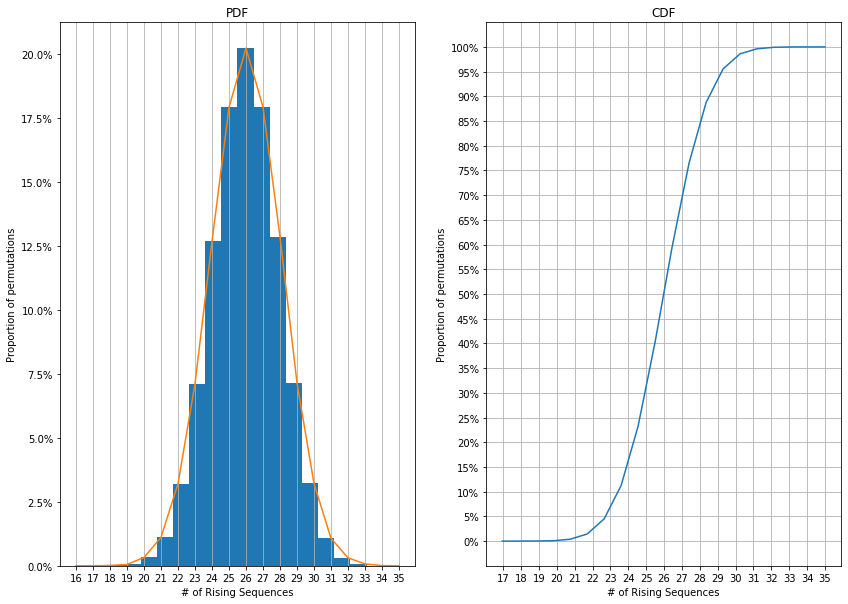

In [43]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(14,10)

ax[0].grid(True, axis="x")
n, bins, patches = ax[0].hist(num_rising_sequences, bins=num_bins, density=True)
ax[0].plot(np.unique(num_rising_sequences), n)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax[0].set(xlabel='# of Rising Sequences', ylabel='Proportion of permutations')
ax[0].set_title("PDF")

ax[1].grid(True)
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
H,X = np.histogram(num_rising_sequences, bins=num_bins, density=True)
dx = X[1] - X[0]
ax[1].plot(X[1:], np.cumsum(H)*dx)
ax[1].set(xlabel='# of Rising Sequences', ylabel='Proportion of permutations')
ax[1].set_title("CDF")

df = pd.DataFrame(num_rising_sequences)
print(df.describe())
plt.show()

This is compared to the expected number of rising sequences after $k$ shuffles.

In [25]:
iters = 10000
o = np.arange(num_cards)

total_shuffles = 15
a = np.zeros([total_shuffles + 1, iters, num_cards])

for i in range(iters):
    a[0, i, :] = o

num_rising_sequences = []
for current_shuffle_num in range(total_shuffles):
    random_list = []
    for i in range(iters):
        shuf_new = AShuffler.shuffle(num_cards)
        new_deck = a[current_shuffle_num, i, :][shuf_new]
        rs = AShuffler.count_rising_sequences(new_deck)
        random_list.append(rs)
        a[current_shuffle_num + 1, i, :] = new_deck

    num_rising_sequences.append(random_list)
    

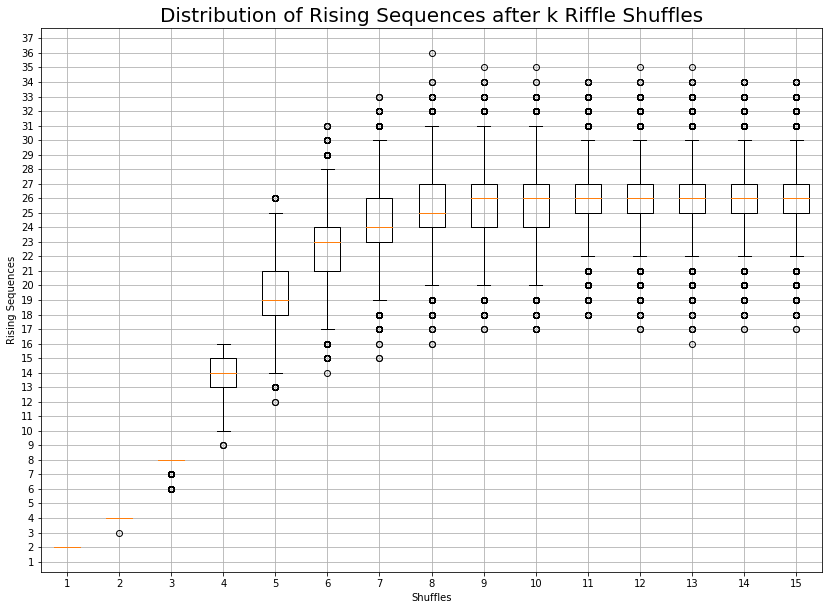

In [27]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(14,10)
ax.set_title("Distribution of Rising Sequences after k Riffle Shuffles", fontsize=20)
ax.boxplot(num_rising_sequences, labels=range(1, total_shuffles+1))
ax.grid(True)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.set(xlabel='Shuffles', ylabel='Rising Sequences')

plt.show()

Some things to note:
\begin{enumerate}
\item As noted above, the maximum amount of rising sequences after $k$ riffle shuffles is $2^k$ so there are no samples *above* $2^k$
\item Before the randomness normalizes, there are more outlier cases below the median than above.  For example, after 2 riffle shuffles, most permutations have 4 rising sequences but there are some permutations which have 3.
\item As expected, the distribution of rising sequences normalizes around 7 shuffles, which is consistent with what Bayer and Diaconis \cite{BD92} observed.
\item The simulation is not truely representitive of $U$ then we would see instances where there is way fewer or way more than the midian number of rising sequences.  After 6 riffle shuffles $2^6 = 64 > 52$ cards there can be anywhere from $1-52$ rising sequences in the deck, yet the observed range only goes from $14-31$
\end{enumerate}

# References

[<a id="cit-GS1955" href="#call-GS1955">GS1955</a>] E Gilbert and C Shannon, ``_Theory of shuffling_'',  1955.

[<a id="cit-BD92" href="#call-BD92">BD92</a>] Bayer Dave and Diaconis Persi, ``_Trailing the Dovetail Shuffle to its Lair_'', Ann. Appl. Probab., vol. 2, number 2, pp. 294--313, 05 1992.  [online](https://doi.org/10.1214/aoap/1177005705)

[<a id="cit-TT2000" href="#call-TT2000">TT2000</a>] Trefethen L. N. and Trefethen L. M., ``_How Many Shuffles to Randomize a Deck of Cards?_'', Proceedings: Mathematical, Physical and Engineering Sciences, vol. 456, number 2002, pp. 2561--2568,  2000.  [online](https://doi.org/10.1098/rspa.2000.0625)

[<a id="cit-MANN95" href="#call-MANN95">MANN95</a>] Mann Brad, ``_How many times should you shuffle a deck of cards_'', Topics in Contemporary Probability and Its Applications, vol. 15, number , pp. 1--33,  1995.

[<a id="cit-Wolfram" href="#call-Wolfram">Wolfram</a>] Wolfram Mathworld, ``_Shuffle_'',  .  [online](https://mathworld.wolfram.com/Shuffle.html)

